In [62]:
## MNIST

from fastai.vision.all import *
import numpy as np


##################################

## not the full MNIST. Just classes 7 and 3

path = untar_data(URLs.MNIST_SAMPLE)

print(   path.ls()   )


[Path('/home/maquina1/.fastai/data/mnist_sample/train'), Path('/home/maquina1/.fastai/data/mnist_sample/valid'), Path('/home/maquina1/.fastai/data/mnist_sample/labels.csv')]


In [63]:
print(  (path/'train').ls()   )

[Path('/home/maquina1/.fastai/data/mnist_sample/train/7'), Path('/home/maquina1/.fastai/data/mnist_sample/train/3')]


In [64]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

##print(  threes  )

im3_path = threes[1]

## uses PIL

im3 = Image.open(im3_path)

im3  

In [65]:
## LOOKING at the image as a numpy array and PyTorch tensor

print(    np.array(im3)[4:10, 4:10]     )

[[  0   0   0   0   0   0]
 [  0   0   0   0   0  29]
 [  0   0   0  48 166 224]
 [  0  93 244 249 253 187]
 [  0 107 253 253 230  48]
 [  0   3  20  20  15   0]]


In [66]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [67]:
import pandas as pd

im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


6131
6265


<AxesSubplot:>

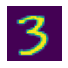

In [68]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

print( len(three_tensors)  )
print( len(seven_tensors)  )

show_image(three_tensors[1])



In [69]:
## make all images in each list into 1 cube (i.e. a tensor of d=3)
## type float and normalized

stacked_sevens = torch.stack(   seven_tensors   ).float()/255
stacked_threes = torch.stack(   three_tensors   ).float()/255

print(  stacked_threes.shape  )


torch.Size([6131, 28, 28])


In [70]:
## tensor rank (dimesionality of vector space)

print(  stacked_threes.ndim   )

3


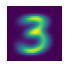

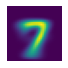

In [71]:
## Calculate the mean of all the image tensors
## For every pixel position, this will compute the average of that pixel
## over all images


## insight: it is darker where all images match and blurry where images do not match

mean3 = stacked_threes.mean(0)     ## 0 is on the zero axis 
show_image(mean3);

mean7 = stacked_sevens.mean(0)     ## 0 is on the zero axis 
show_image(mean7);

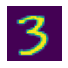

In [72]:
## Now we will measure the distance between one image and the mean of images for similarity 

## Get any image from the stack of images

a_3 = stacked_threes[1]    ## slice one out
show_image(a_3);

In [73]:
## calc L1-norm distance or CALC L2-norm (RMSE)

dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()

print("single 3 to mean 3")
print(dist_3_abs)
print(dist_3_sqr)


## not compare to the single 3 image to 7s mean

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()

print('**********************')
print("single 3 to mean 7")
print(dist_7_abs)
print(dist_7_sqr)



single 3 to mean 3
tensor(0.1114)
tensor(0.2021)
**********************
single 3 to mean 7
tensor(0.1586)
tensor(0.3021)


In [74]:
## L1 and L2 are in torch 
## import torch.nn.functional as torch_f
## or
## fastai already has its own way of calling them

print(   F.l1_loss( a_3.float(), mean7)   )
print(   F.mse_loss(a_3, mean7).sqrt())

tensor(0.1586)
tensor(0.3021)


In [75]:
## Numpy Arrays and PyTorch tensors

data = [[1, 2, 3], [4, 5, 6]]
arr  = array(data)              ## fastai's way of incorporating numpy 
tns  = tensor(data)             ## fastai's way of incorporating torch

print(arr)
print(tns)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


In [76]:
print(  tns[1]     )
print(  tns[:, 1]  )
print(  tns[1, 1:3])
print(    tns+1     )
print(    tns.type()     )
print(    tns*1.5        )


tensor([4, 5, 6])
tensor([2, 5])
tensor([5, 6])
tensor([[2, 3, 4],
        [5, 6, 7]])
torch.LongTensor
tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])


In [77]:
## validation set, create torch tensor and normalize it for 3 and 7

valid_3_tens = torch.stack(   [  tensor(Image.open(o))  for o in (path/'valid'/'3').ls()]   )
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack(   [  tensor(Image.open(o))  for o in (path/'valid'/'7').ls()]   )
valid_7_tens = valid_7_tens.float()/255

print(  valid_3_tens.shape  )
print(  valid_7_tens.shape  )

torch.Size([1010, 28, 28])
torch.Size([1028, 28, 28])


In [78]:
## function to get mean absolute error with the tensors 
## a-b  will use broadcasting when necessary 
## the (-1, -2) tells torch to calc mean only on the last 2 of the 3 axes (i.e. the 28x28 part )
## we take the differences first, then abs, and then mean

def mnist_distance(a, b):
    return (a-b).abs().mean((-1, -2))

print(    mnist_distance(a_3, mean3)    )

tensor(0.1114)


In [79]:
## now to calculate a metric for overall accuracy of a batch of images from the validation set (all 1010 at once)


## gives tensor of distances

valid_3_dist = mnist_distance(valid_3_tens, mean3)    
print(  valid_3_dist            )
print(  valid_3_dist.shape      )

tensor([0.1432, 0.1304, 0.1305,  ..., 0.1540, 0.1360, 0.1094])
torch.Size([1010])


In [80]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)


print(    is_3(a_3)             )
print(    is_3(a_3).float()     )

print(    is_3(valid_3_tens)    )

tensor(True)
tensor(1.)
tensor([True, True, True,  ..., True, True, True])


In [81]:
## now calculate accuracy of this model

accuracy_3s   =      is_3(valid_3_tens).float().mean()
accuracy_7s   = (1 - is_3(valid_7_tens).float()).mean()


print(   accuracy_3s       )
print(   accuracy_7s       )
print(   (accuracy_3s + accuracy_3s )/2       )

tensor(0.9168)
tensor(0.9854)
tensor(0.9168)


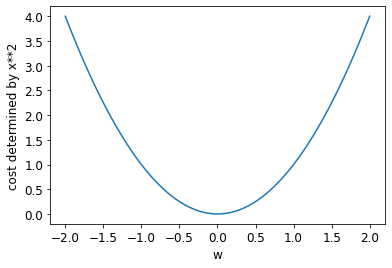

In [82]:
## the training process and stochastic gradient descent
## THE PREVIOUS technique does not learn weights for a model
## so now we look at gradient descent so we can learn weights

## motivating SGD with the quadratic function


from fastbook import *

def f(w):
    return w**2

plot_function(f, 'w', 'cost determined by x**2')

In [83]:
## calculus
## getting the derivatives (e.g. the gradients)
## in deep learning, "gradient" usually means the value of a function's derivative at
## a paticular argument value (the weight)
## the focus is also on the variable (tensor(3.)), and not the function (e.g the cuadratic) 
## which is counter-intuitive

def f(w):
    return w**2

xt = tensor(3.).requires_grad_()

yt = f(xt)

print("notice the gradient association now of grad_fn")
print(yt)

notice the gradient association now of grad_fn
tensor(9., grad_fn=<PowBackward0>)


In [84]:
## now we tell pytorch to calc the gradients 

yt.backward()

## to view the gradient

print(  xt.grad    )

## in math, the function is x**2
## the derivative is   2x
## the variable x = 3
## the result is:   2x = 2(3) = 6

tensor(6.)


In [85]:
## now the same gradient scheme but with 3 weights instead of 
## just one, so a vector

xt = tensor([3., 4., 10.]).requires_grad_()
print(xt)

def f(x):
    return (x**2).sum()       ## sums all 3 values in vector

yt = f(xt)
print(    yt    )

yt.backward()
print(     xt.grad     )

tensor([ 3.,  4., 10.], requires_grad=True)
tensor(125., grad_fn=<SumBackward0>)
tensor([ 6.,  8., 20.])


In [86]:
## now we use xt.grad to adjust the weights
## w = w - (xt.grad * learning_rate)



In [87]:
## a model of how the speed of a roller coaster changes over time
## say, every 20 seconds

time = torch.arange(0, 20).float()

print(time)



tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])


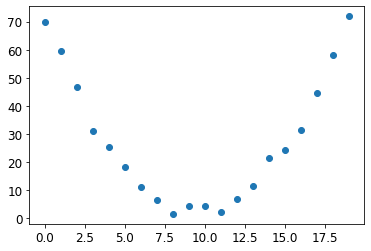

In [88]:
speed = torch.randn(20)*3 + 0.75*(time - 9.5)**2 + 1
##         random_noise   +       quadratic func

plt.scatter(time, speed)

In [89]:
## from the graph we now it is quadratic so we infer to just use that as a function
## for our model

def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t) + c

## we are not letting a neural net figure out the function
## instead we just pick a quadratic function, and we only need to learn the values a, b, c



In [90]:
## Now define a loss function which compares pred to true and return a values of the cost. Lower is better
## we can use MSE - > mean squared error

def mse(preds, targets):
    return ((preds-targets)**2).mean()


In [91]:
## define params a, b, c
## these are what we need to learn

params = torch.randn(3).requires_grad_()

## now the function to calc predictions

preds = f(time, params)



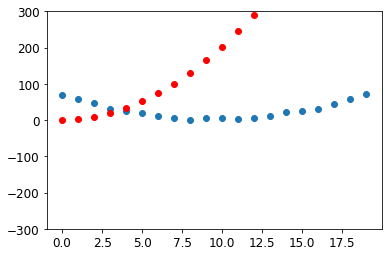

In [92]:
## now plot the pred which still has random parameters


def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 300)
    
show_preds(preds)

In [93]:
## calculate the loss

loss = mse(preds, speed)

print(loss)

tensor(98142.1094, grad_fn=<MeanBackward0>)


In [94]:
## we want to minimize the loss

## optimization with gradient descent is need here
## and for that we need "the gradients" which are the derivatives
## of the loss function for each parameter (e.g. the weights)

loss.backward()

print(params.grad)

tensor([104729.5312,   6728.4727,    442.6189])


In [95]:
## now we need to update the parameters with a learning rate

lr = 1e-5        ## 0.00001

params.data = params.data - lr * params.grad.data
params.grad = None    ## to calc the next set?



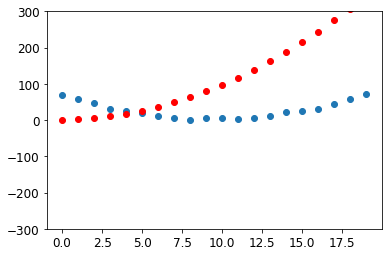

In [96]:
## let us see if the params improved

preds = f(time, params)

mse(preds, speed)

show_preds(preds)



In [97]:
## now repeat several times 

def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data = params.data - lr * params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return preds


## the main loop

for i in range(10):
    apply_step(params)

19118.15625
4164.4150390625
1334.705810546875
799.2354736328125
697.9053955078125
678.7276611328125
675.095703125
674.4055786132812
674.2720947265625
674.2438354492188


674.2357177734375
674.231201171875
674.2273559570312
674.2237548828125


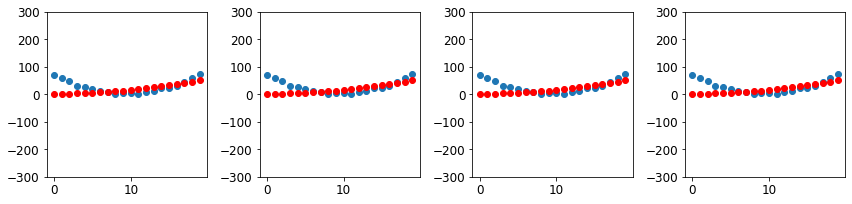

In [98]:
## plot it

_, axs = plt.subplots(1, 4, figsize=(12, 3))

for ax in axs:
    show_preds(apply_step(params, True), ax)

plt.tight_layout()

In [99]:
## the view method in PyTorch lets you reshape
## make images from 2d (28x28) to 1d (784)

train_x = torch.cat(   [stacked_threes, stacked_sevens]   ).view(-1, 28*28)

## now the labels

train_y = tensor([1]*len(threes) + [0]*len(sevens))
print(train_y.shape)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)  # unsqueeze to make column vector
print(train_y.shape)
print(train_x.shape)

torch.Size([12396])
torch.Size([12396, 1])
torch.Size([12396, 784])


In [100]:
## PyTorch requires a dataset to be a tuple (x, y)
## we do it like this

dset = list(     zip(train_x, train_y)      )

x, y = dset[0]

print(  x.shape  )
print(  y  )
print(  y.shape   )



torch.Size([784])
tensor([1])
torch.Size([1])


In [101]:
## now the validation set

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))



In [102]:
## now we need weights for every single of the 784 pixels
## we initialize these

def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()


weights = init_params((28*28, 1))          ## shape (784, 1)


## also the bias y = wx + b

bias = init_params(1)                      ## shape (1)

## predict value for one image using random params

y_temp = (train_x[0] * weights.T).sum() + bias
print(  y_temp  )

tensor([2.3345], grad_fn=<AddBackward0>)


In [103]:
## matrix multp

def linear1(xb):
    return xb@weights + bias


preds = linear1(train_x)

print(preds)

tensor([[ 2.3345],
        [17.5651],
        [ 3.2925],
        ...,
        [-2.2805],
        [-3.2090],
        [-3.0192]], grad_fn=<AddBackward0>)


In [104]:
corrects = (preds>0.0).float() == train_y

print(corrects)

r = corrects.float().mean().item()

print(r)

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]])
0.6477895975112915


In [105]:
## the torch.where(a, b, c) function measures how distant each prediction is from 1 if it should be 1, and 
## how distant it is from 0 if it should be 0, and then it will take the mean of all those distances


def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()




In [106]:
## the sigmoid to make predictions between 0 and 1

def sigmoid(x):
    return 1/(1+torch.exp(-x))

## or torch.sigmoid


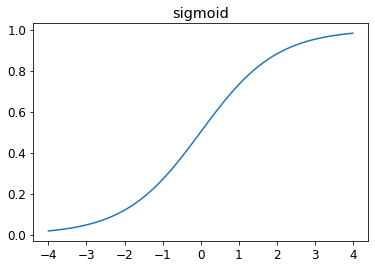

In [107]:
## to view it

plot_function(torch.sigmoid, title='sigmoid', min=-4, max=4)

In [108]:
## update mnist loss with the sigmoid


def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(  targets==1, 1-predictions, predictions   ).mean()



In [109]:
## putting it all together for mnist

train_x = torch.cat(   [stacked_threes, stacked_sevens]   ).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)  # unsqueeze to make column vector
dset = list(     zip(train_x, train_y)      )

###########################

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

############################

dl = DataLoader(dset, batch_size=256)

############################

valid_dl = DataLoader(valid_dset, batch_size=256)

############################

def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

##############################

weights = init_params((28*28, 1))
bias    = init_params(1)

params = weights, bias

############################

def linear1(xb):
    return xb@weights + bias

############################

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(  targets==1, 1-predictions, predictions   ).mean()

###########################

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss  = mnist_loss(preds, yb)
    loss.backward()
    
##########################    
    
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()                ## delete the old ones or they are added up!!
            
##########################
            
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

##########################

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(   torch.stack(accs).mean().item(),  4   )

##########################

lr = 0.1

for i in range(20):
    train_epoch(linear1, lr, params)
    print(   validate_epoch(linear1),    end=' '   )



0.5072 0.5199 0.5477 0.6119 0.7213 0.7842 0.8119 0.8266 0.8462 0.8589 0.8706 0.881 0.8884 0.8963 0.9002 0.9046 0.9099 0.9139 0.9163 0.9203 

In [110]:
## a fastai approach


train_x = torch.cat(   [stacked_threes, stacked_sevens]   ).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)  # unsqueeze to make column vector
dset = list(     zip(train_x, train_y)      )

###########################

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

############################

dl = DataLoader(dset, batch_size=256)

############################

valid_dl = DataLoader(valid_dset, batch_size=256)

############################

dls = DataLoaders(dl, valid_dl)

############################

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(  targets==1, 1-predictions, predictions   ).mean()


##########################
            
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()


####################################
    
linear_model = nn.Linear(28*28, 1)

simple_net = nn.Sequential(
       nn.Linear(28*28, 30),
       nn.ReLU(),
       nn.Linear(30, 1)
)


#learn = Learner(dls, linear_model, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
#learn.fit(10, lr=0.1)

learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, lr=0.1)



epoch,train_loss,valid_loss,batch_accuracy,time
0,0.305043,0.418557,0.504907,00:00
1,0.144376,0.232174,0.798822,00:00
2,0.080429,0.117245,0.912659,00:00
3,0.053196,0.078993,0.939647,00:00
4,0.040527,0.061562,0.955348,00:00
5,0.034015,0.051819,0.962709,00:00
6,0.030244,0.045691,0.964671,00:00
7,0.027777,0.041493,0.966634,00:00
8,0.025993,0.038426,0.968106,00:00
9,0.024610,0.036073,0.968106,00:00


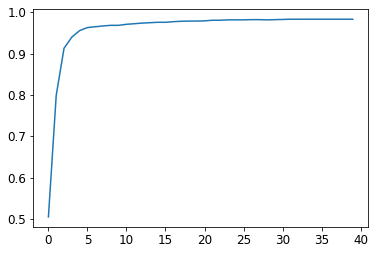

In [111]:
plt.plot(   L(learn.recorder.values).itemgot(2)   );

In [112]:
## HW: build several NN architectures and train and test



In [113]:
## or instead of all of the previous, just do this :)

## an 18 layer model with resnet

## as it turns out more layers with smaller matrices (parameters), is better than fewer layers but larger 
## matrices (parameters), fastai book page 180

dls = ImageDataLoaders.from_folder(path)

learn = cnn_learner(dls, resnet18, pretrained=False, 
                    loss_func=F.cross_entropy, metrics=accuracy)


lr = 0.1
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.109702,0.018199,0.996565,00:05


In [114]:
## rank-0   -->   scalar
## rank-1   -->   vector
## rank-2   -->   matrix